# Day and Night Image Classifier

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

Note: All images come from the AMOS dataset, Archive of Many Outdoor Scenes

## Import resources

Before you get started on the project code, import the libraries and resources that you'll need.

In [2]:
import cv2 # computer vision library
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

## Training and Testing Data

The 200 day/night images are separated into training and testing datasets.

- 60% of these images are training images, for you to use as you create a classifier.
- 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

- image_dir_training: the directory where our training image data is stored.
- imade_dir_test: the directory where our test image data is stored.

In [3]:
# Image data directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

## Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, **IMAGE_LIST**. This list contains the images and their associated label ("day" or "night").

For example, the first image-label pair in *IMAGE_LIST* can be accessed by index: **IMAGE_LIST[0][:]**

In [4]:
# Using the load dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(image_dir_training)

# Visualizing the Data

In [5]:
# Select and image and its label by list index
image_index = 0
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

print('The shape of the image: ',selected_image.shape)
print('The image\'s label: ',selected_label)

The shape of the image:  (593, 800, 3)
The image's label:  day


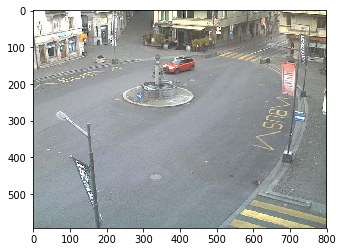

In [6]:
# Display it!
plt.imshow(selected_image)

In [ ]:
"""
helpers.load_dataset(image_dir_training)
"""

# This function loads in images and their labels and places them in a list
# The list contains all images and their associated labels
# For example, after data is loaded, im_list[0][:] will be the first image-label pair in the list
def load_dataset(image_dir):
    
    # Populate this empty image list
    im_list = []
    image_types = ["day", "night"]
    
    # Iterate through each color folder
    for im_type in image_types:
        
        # Iterate through each image file in each image_type folder
        # glob reads in any image with the extension "image_dir/im_type/*"
        for file in glob.glob(os.path.join(image_dir, im_type, "*")):
            
            # Read in the image
            im = mpimg.imread(file)
            
            # Check if the image exists/if it's been correctly read-in
            if not im is None:
                # Append the image, and it's type (red, green, yellow) to the image list
                im_list.append((im, im_type))
    
    return im_list

# Pre-process the Data

After loading in each image, you have to standardize the input and output.

## Standardize the input

It's important to make all your images the same size so that they can be sent through the same pipeline of classification steps! Every input image should be in the same format, of the same size, and so on.

- Resize each image to the desired input size: 600x1100px

In [15]:
# This function should take in an RGB image and 
# return a new, standardized version
def standardize_input(image):
    
    # Resize image so that all standard images are
    # the same size 600x1100
    standard_im = cv2.resize(image,(1100,600))
    
    return standard_im
    

## Standardize the output

With each loaded image, you also need to specify the expected output. For this, use binary numerical values 0/1 = night/day.

In [11]:
# Examples:
# encode("day") should return: 1
# encode("night") should return: 0

def encode(label):
    # complete the code to produce a numerical label
    if label == "night":
        numerical_val = 0
        return numerical_val
    elif label == "day":
        numerical_val = 1
        return numerical_val
    else:
        error = "unknown class"
        return error

## Construct a STANDARDIZED_LIST of input images and output labels

This function takes in a list of image-label pairs and outputs a standardized list of resized images and numerical labels.

This uses the functions we defined above to standardize the input and output.

In [16]:
def standardize(image_list):
    
    # Empty image data array
    standard_list = []
    
    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]
        
        # Standardize the image
        standardized_im = standardize_input(image)
        
        # Create a numerical label
        binary_label = encode(label)
        
        # Append the image, and it's one hot encoded label
        # to the full, processed list of image data
        standard_list.append((standardized_im, binary_label))
        
    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

## Visualize the standardized data

Display a standardized image from STANDARDIZED_LIST

The shape of the image:  (600, 1100, 3)
The image's label:  1


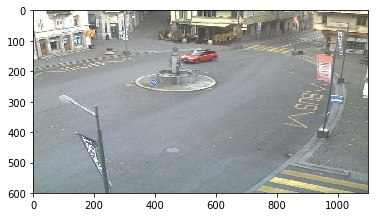

In [17]:
# Select and image and its label by list index
image_index = 0
selected_image = STANDARDIZED_LIST[image_index][0]
selected_label = STANDARDIZED_LIST[image_index][1]

plt.imshow(selected_image)
print('The shape of the image: ',selected_image.shape)
print('The image\'s label: ',selected_label)

# Feature Extraction

Create a feature that represents the brightness in an image. We'll be extracting the average brightness using HSV colorspace. Specifically, we'll use the V channel (a measure of brightness), add up the pixel values in the V channel, then divide that sum by the area of the image to get average Value of the image.

## RGB to HSV Conversion

Label:  1


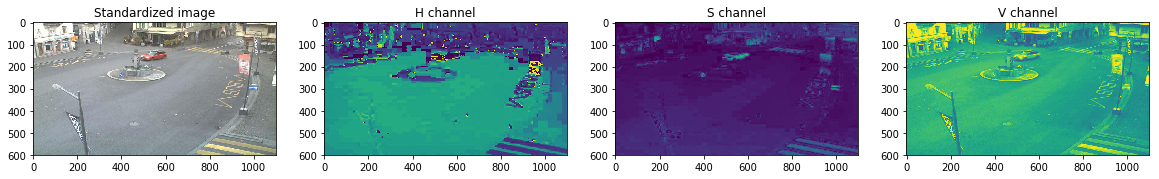

In [18]:
# Convert and image to HSV colorspace
# Visualize the individual color channels

image_num = 0
test_im = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

# Convert to HSV
hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)

# Print image label
print('Label: ', test_label)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Plot the original image and the three channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Standardized image')
ax1.imshow(test_im)
ax2.set_title('H channel')
ax2.imshow(h)
ax3.set_title('S channel')
ax3.imshow(s)
ax4.set_title('V channel')
ax4.imshow(v)

## Find the average brightness using the V channel

This function takes in a standardized RGB image and returns a feature (a single value) that represent the average level of brightness in the image. We'll use this value to classify the image as day or night.

In [22]:
# Find the average Value or Brightness of an image
def avg_brightness(rgb_image):
    
    # Convert image to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    
    # Add up all the pixel values in the V channel
    sum_brightness = np.sum(hsv[:,:,2])
    
    # Calculate the average brightness using the area
    # of the image and the sum calculated above
    area = rgb_image.shape[0] * rgb_image.shape[1]
    avg = (float)(sum_brightness / area)
    
    return avg

Avg brightness:  35.977059090909094


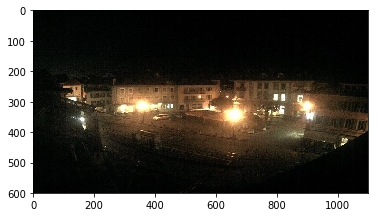

In [37]:
# Testing average brightness levels
# Look at a number of different day and night images
# and think about what average brightness value
# separates the two types of images

# As an example, a night image is loaded in and
# its avg brightness is displayed
image_num = 190
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: ', avg)
plt.imshow(test_im)

# Classification and Visualizing Error

In this section, we'll turn our average brightness feature into a classifier that takes in a standardized image and returns a **predicted_label** for that image. This **estimate_label** function should return a value: 0 or 1 (night or dat, respectively)

## Build a complete classifier

Set a threshold that you think will separate the day and night images by average brightness.

In [38]:
# This function should take in RGB image input
def estimate_label(rgb_image):
    
    # extract average brightness feature from an RGB image
    # Use the avg brightness feature to predict a label(0,1)
    predicted_label = 0
    avg = avg_brightness(rgb_image)
    
    # set the value of a threshold that will
    # separate day and night images
    threshold_value = 100
    
    # Rerurn the predicted_label (0 or 1) based on whether
    # the avg is above or below the threshold
    if avg > threshold_value:
        predicted_label = 1
        
    return predicted_label

Estimated Label:  1


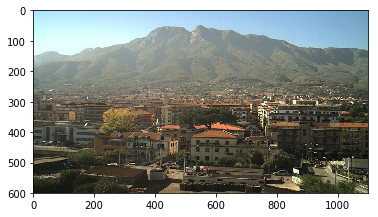

In [43]:
# Test out our code by calling the above function 
# and seeing how some of our training data
# is classified
image_num = 21
test_im = STANDARDIZED_LIST[image_num][0]

estimated_label = estimate_label(test_im)
print('Estimated Label: ', estimated_label)
plt.imshow(test_im)

# Testing the classifier

Here is where we test our classification algorithm using our test set of data that set aside at the beginning of the notebook!

Since we are using a pretty simple brightness feature, we may not expect this classifier to be 100% accurate. We'll aim for around 75-95% accuracy using this one feature.

## Test dataset

Below, we load in the test dataset, standardize it using the standardize function we defined before, and then shuffle it; this ensures that order will not play a role in testing accuracy.

In [44]:
import random

# Using the load_dataset function in helpers.py
# Load test data
TEST_IMAGE_LIST = helpers.load_dataset(image_dir_test)

# Standardize the test data
STANDARDIZED_TEST_LIST = helpers.standardize(TEST_IMAGE_LIST)

# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

## Determine the Accuracy

Compare the output of our classification algorithm with the true labels and determine the accuracy.

This code stores all the misclassified images, their predicted labels, and their true labels, in a list called misclassified.

In [45]:
# Constructs a list of misclassified images given a list
# of test images and their labels
def get_misclassified_images(test_images):
    # Track misclassified images by placind them into a list
    misclassified_images_labels = []
    
    # Iterate through all the test images
    for image in test_images:
        
        # Get true data
        im = image[0]
        true_label = image[1]
        
        # Get predicted label from our classifier
        predicted_label = estimate_label(im)
        
        # Compare true and predicted labels
        if(predicted_label != true_label):
            # If these labels are not equal, 
            # the image has been misclassified
            misclassified_images_labels.append(
                (im, predicted_label, true_label))
    
    # Return the list of misclassified values
    # [image, predicted_label, true_label]
    return misclassified_images_labels

In [46]:
# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = (float)(num_correct/total)

print('Accuracy: ', accuracy)
print('Number of misclassified images = ', len(MISCLASSIFIED), ' out of ', total)

Accuracy:  0.925
Number of misclassified images =  12  out of  160


## Visualize the misclassified images

Visualize some of the images we classified wrong and note any qualities that makem them difficult to classify. This would help us identify any weaknesses in our classification algorithm.

1


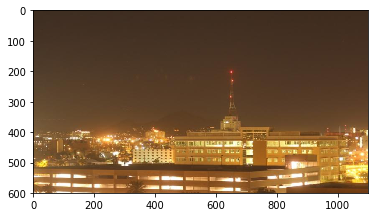

In [64]:
# Visualize misclassified example
# Display an image in MISCLASSIFIED list
# Print out its predicted label - to see what
# the image was incorrectly classified
num = 5
test_mis_im = MISCLASSIFIED[num][0]
plt.imshow(test_mis_im)
print(str(MISCLASSIFIED[num][1]))

## Question! - After visualizing these misclassifications, what weaknesses do you think our classification algorithm has?

In [ ]:
# Answer here!


## Improve our algorithm!

- Tweak our threshold so that accuracy is better.
- Add another feature that a weakness we identified!